In [1]:
import os
import sys
import argparse
import glob
import pprint
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [2]:
pd.__version__

'1.0.1'

In [3]:
dist_csvs = glob.glob("../distances/*csv")

In [4]:
distDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in dist_csvs])

In [5]:
distDF

,rank,accession,jaccard,filename
path,,,,
path1,species,GB_GCA_001593925.1_protein.faa.gz,1.000000,evol_paths_pep.protein_scaled200_k7.jaccard_fr...
path1,genus,GB_GCA_001593935.1_protein.faa.gz,0.148018,evol_paths_pep.protein_scaled200_k7.jaccard_fr...
path1,family,GB_GCA_001593845.1_protein.faa.gz,0.026064,evol_paths_pep.protein_scaled200_k7.jaccard_fr...
path1,order,GB_GCA_002507245.1_protein.faa.gz,0.017338,evol_paths_pep.protein_scaled200_k7.jaccard_fr...
path1,class,GB_GCA_001774245.1_protein.faa.gz,0.004682,evol_paths_pep.protein_scaled200_k7.jaccard_fr...
...,...,...,...,...
path999,family,GB_GCA_900317525.1_protein.faa.gz,0.015378,evol_paths_pep.dayhoff_scaled200_k17.jaccard_f...
path999,order,GB_GCA_003446315.1_protein.faa.gz,0.003046,evol_paths_pep.dayhoff_scaled200_k17.jaccard_f...
path999,class,GB_GCA_001304935.1_protein.faa.gz,0.002893,evol_paths_pep.dayhoff_scaled200_k17.jaccard_f...


In [6]:
distDF.iloc[0]["filename"]

'evol_paths_pep.protein_scaled200_k7.jaccard_from_species.csv'

In [7]:
# add new columns based on scaled, ksize etc in the filenames
# NOTE:this is specific to the "evol_paths_first_seven_" basename
distDF["scaled"]= distDF["filename"].str.extract(r"scaled(\d*)")
distDF["ksize"] = distDF["filename"].str.extract(r"k(\d*)")
distDF["molecule"] = distDF["filename"].str.extract(r"evol_paths_(\w*)")
distDF["full_alphabet"] = distDF["filename"].str.extract(r"\w.(\w*)_scaled")
distDF["alphabet"] = distDF["full_alphabet"].str.replace("translate_", "")
steps_to_common_ancestor = {"species": 0, "genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom": 6}
distDF["steps to common ancestor"] = distDF.apply(lambda x: steps_to_common_ancestor[x["rank"]], axis=1)


In [8]:
distDF = distDF.reset_index()


In [9]:
distDF

,path,rank,accession,jaccard,filename,scaled,ksize,molecule,full_alphabet,alphabet,steps to common ancestor
0,path1,species,GB_GCA_001593925.1_protein.faa.gz,1.000000,evol_paths_pep.protein_scaled200_k7.jaccard_fr...,200,7,pep,protein,protein,0
1,path1,genus,GB_GCA_001593935.1_protein.faa.gz,0.148018,evol_paths_pep.protein_scaled200_k7.jaccard_fr...,200,7,pep,protein,protein,1
2,path1,family,GB_GCA_001593845.1_protein.faa.gz,0.026064,evol_paths_pep.protein_scaled200_k7.jaccard_fr...,200,7,pep,protein,protein,2
3,path1,order,GB_GCA_002507245.1_protein.faa.gz,0.017338,evol_paths_pep.protein_scaled200_k7.jaccard_fr...,200,7,pep,protein,protein,3
4,path1,class,GB_GCA_001774245.1_protein.faa.gz,0.004682,evol_paths_pep.protein_scaled200_k7.jaccard_fr...,200,7,pep,protein,protein,4
...,...,...,...,...,...,...,...,...,...,...,...
325859,path999,family,GB_GCA_900317525.1_protein.faa.gz,0.015378,evol_paths_pep.dayhoff_scaled200_k17.jaccard_f...,200,17,pep,dayhoff,dayhoff,2
325860,path999,order,GB_GCA_003446315.1_protein.faa.gz,0.003046,evol_paths_pep.dayhoff_scaled200_k17.jaccard_f...,200,17,pep,dayhoff,dayhoff,3
325861,path999,class,GB_GCA_001304935.1_protein.faa.gz,0.002893,evol_paths_pep.dayhoff_scaled200_k17.jaccard_f...,200,17,pep,dayhoff,dayhoff,4
325862,path999,phylum,GB_GCA_002391555.1_protein.faa.gz,0.003668,evol_paths_pep.dayhoff_scaled200_k17.jaccard_f...,200,17,pep,dayhoff,dayhoff,5


In [10]:
distDF = distDF.rename(columns={'index': 'path'})

In [11]:
sns.set_style("white")

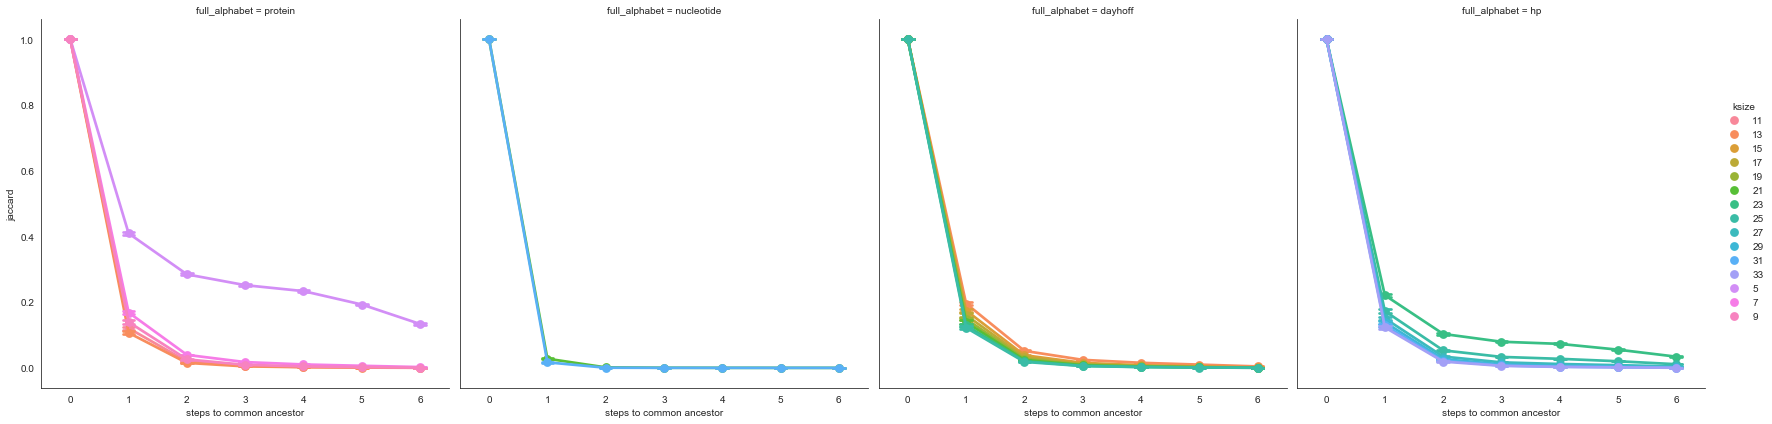

In [12]:
g = sns.catplot(data=distDF, x="steps to common ancestor", y="jaccard", hue="ksize", col="full_alphabet",
                capsize=.2, height=6, aspect=1,
                kind="point") #palette="YlGnBu_d"
g.savefig('evol_path_by_alphabet_jaccard.pdf')

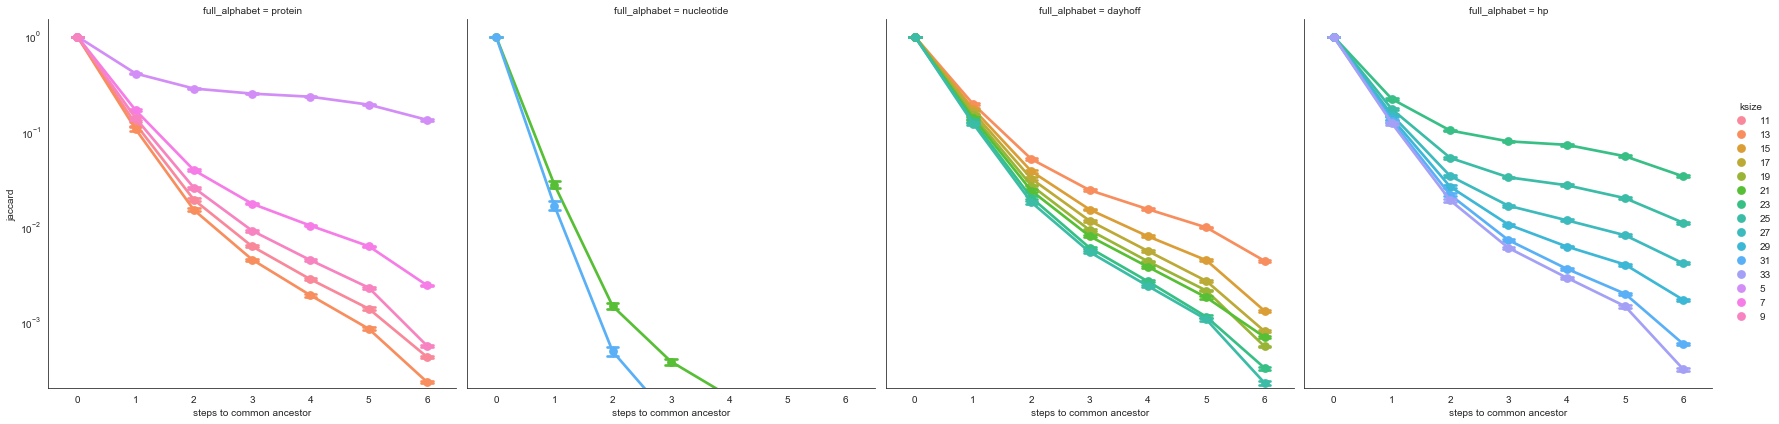

In [13]:
g = sns.catplot(data=distDF, x="steps to common ancestor", y="jaccard", hue="ksize", col="full_alphabet",
                capsize=.2, height=6, aspect=1,
                kind="point") #palette="YlGnBu_d"
g.set(yscale="log")
g.savefig('evol_path_by_alphabet_jaccard_logscale.pdf')

In [14]:
# pull out a single ksize, alpha to look at 

#dayhoff19 = distDF[(distDF["alphabet"] == "dayhoff") & (distDF["scaled"]== "200") & (distDF["ksize"] == "19")]
dayhoff19 = distDF[(distDF["alphabet"] == "dayhoff")  & (distDF["ksize"] == "19")]

In [15]:
dayhoff19

,path,rank,accession,jaccard,filename,scaled,ksize,molecule,full_alphabet,alphabet,steps to common ancestor
74060,path1,species,GB_GCA_001593925.1_protein.faa.gz,1.000000,evol_paths_pep.dayhoff_scaled200_k19.jaccard_f...,200,19,pep,dayhoff,dayhoff,0
74061,path1,genus,GB_GCA_001593935.1_protein.faa.gz,0.129351,evol_paths_pep.dayhoff_scaled200_k19.jaccard_f...,200,19,pep,dayhoff,dayhoff,1
74062,path1,family,GB_GCA_001593845.1_protein.faa.gz,0.020069,evol_paths_pep.dayhoff_scaled200_k19.jaccard_f...,200,19,pep,dayhoff,dayhoff,2
74063,path1,order,GB_GCA_002507245.1_protein.faa.gz,0.013674,evol_paths_pep.dayhoff_scaled200_k19.jaccard_f...,200,19,pep,dayhoff,dayhoff,3
74064,path1,class,GB_GCA_001774245.1_protein.faa.gz,0.001354,evol_paths_pep.dayhoff_scaled200_k19.jaccard_f...,200,19,pep,dayhoff,dayhoff,4
...,...,...,...,...,...,...,...,...,...,...,...
281423,path999,family,GB_GCA_900317525.1_protein.faa.gz,0.013868,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,2
281424,path999,order,GB_GCA_003446315.1_protein.faa.gz,0.002650,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,3
281425,path999,class,GB_GCA_001304935.1_protein.faa.gz,0.002449,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,4
281426,path999,phylum,GB_GCA_002391555.1_protein.faa.gz,0.003853,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,5


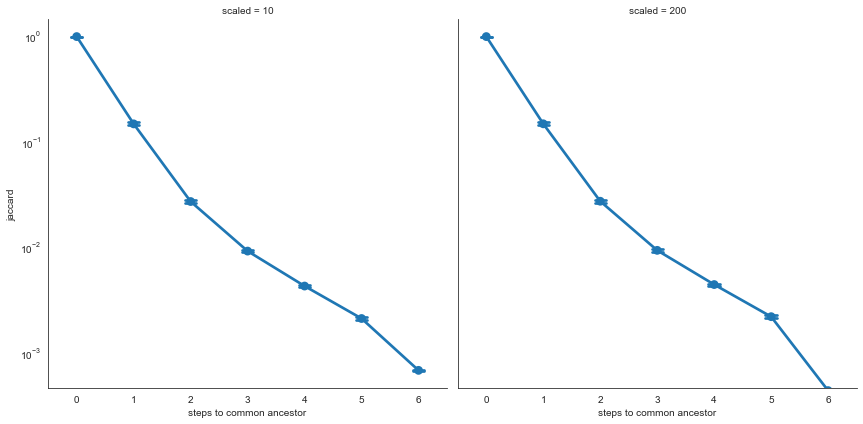

In [16]:
g = sns.catplot(data=dayhoff19, x="steps to common ancestor", y="jaccard",col="scaled",
                capsize=.2, height=6, aspect=1,
                kind="point") #palette="YlGnBu_d"
g.set(yscale="log")

In [28]:
g = sns.catplot(data=dayhoff19, x="steps to common ancestor", y="jaccard",col="scaled",
                capsize=.2, height=6, aspect=1,cd="sd"
                kind="point") #palette="YlGnBu_d"
g.set(yscale="log")

SyntaxError: invalid syntax (<ipython-input-28-d1245fa9d822>, line 3)

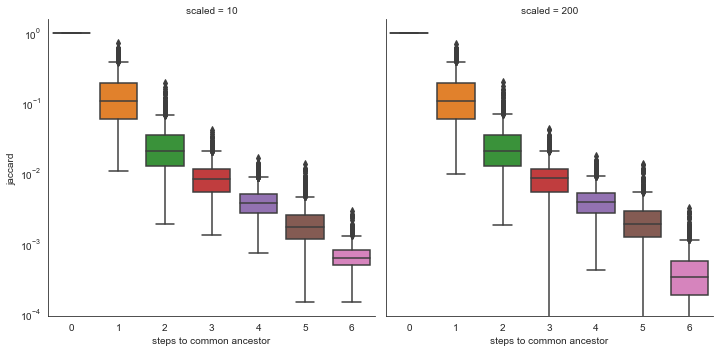

In [17]:
g = sns.catplot(data=dayhoff19,x="steps to common ancestor", y="jaccard", kind="box", col="scaled")
g.set(yscale="log")

In [18]:
# kind = swarm ==> takes forever

#g = sns.catplot(data=dayhoff19, x="steps to common ancestor", y="jaccard", kind="swarm") #, #hue="ksize", col="full_alphabet",
                #capsize=.2, height=6, aspect=1,
               # kind="point") #palette="YlGnBu_d"
#g.set(yscale="log")

In [19]:
dayhoff25 = distDF[(distDF["alphabet"] == "dayhoff") & (distDF["scaled"]== "200") & (distDF["ksize"] == "25")]

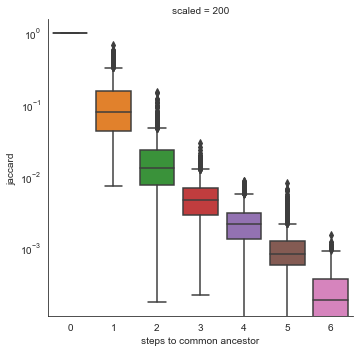

In [20]:
g = sns.catplot(data=dayhoff25,x="steps to common ancestor", y="jaccard", kind="box", col= "scaled")
g.set(yscale="log")

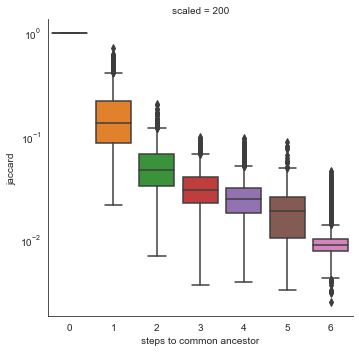

In [21]:
hp33 = distDF[(distDF["alphabet"] == "hp") & (distDF["ksize"] == "25")]
g = sns.catplot(data=hp33,x="steps to common ancestor", y="jaccard", kind="box", col="scaled")
g.set(yscale="log")

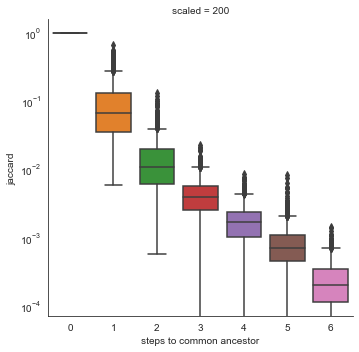

In [22]:
prot13 = distDF[(distDF["alphabet"] == "protein") & (distDF["ksize"] == "13")]
g = sns.catplot(data=prot13,x="steps to common ancestor", y="jaccard", kind="box", col="scaled")
g.set(yscale="log")

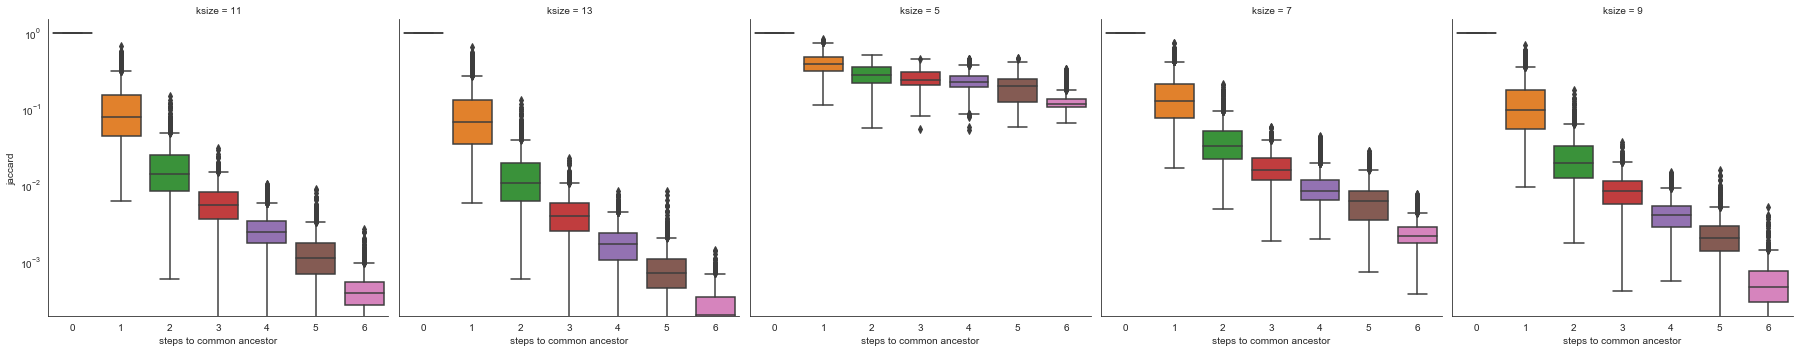

In [23]:
prot = distDF[(distDF["alphabet"] == "protein")]
g = sns.catplot(data=prot,x="steps to common ancestor", y="jaccard", kind="box", col="ksize")
g.set(yscale="log")

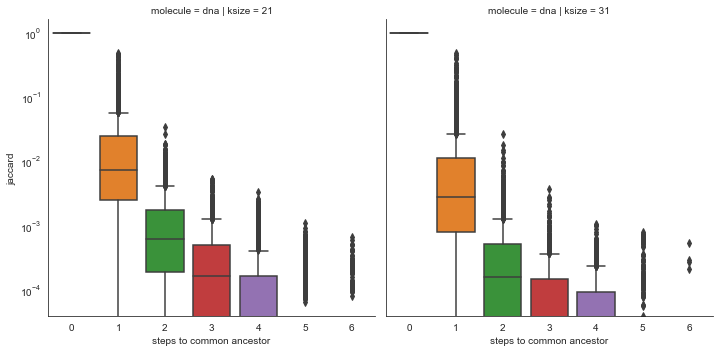

In [24]:
nucl = distDF[(distDF["alphabet"] == "nucleotide")]
g = sns.catplot(data=nucl,x="steps to common ancestor", y="jaccard", kind="box", col="ksize", row="molecule")
g.set(yscale="log")

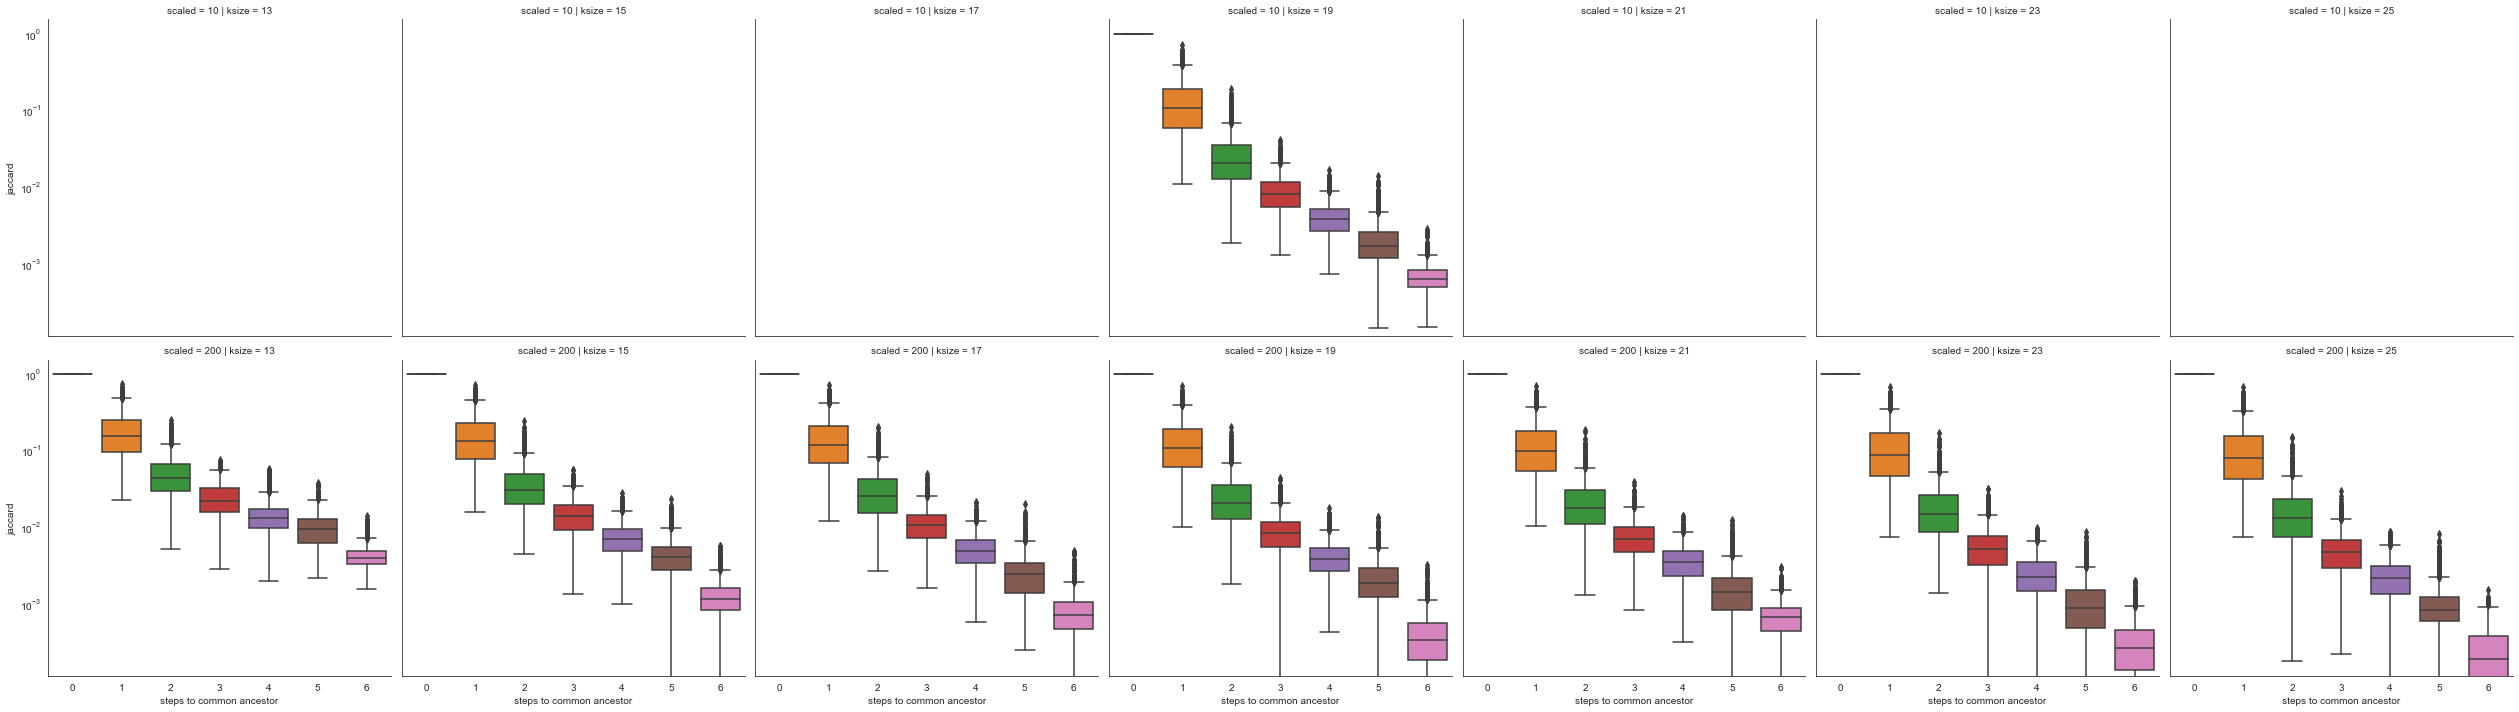

In [25]:
dayhoff = distDF[(distDF["alphabet"] == "dayhoff")]
g = sns.catplot(data=dayhoff,x="steps to common ancestor", y="jaccard", kind="box", col="ksize", row="scaled")
g.set(yscale="log")

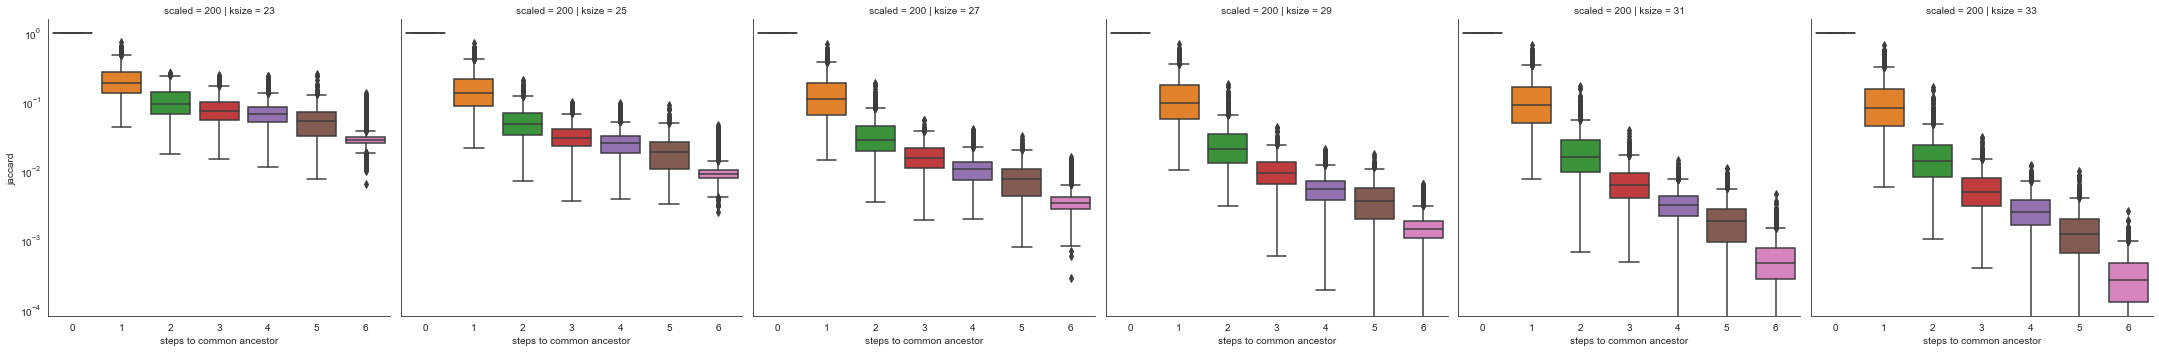

In [26]:
hp = distDF[(distDF["alphabet"] == "hp")]
g = sns.catplot(data=hp,x="steps to common ancestor", y="jaccard", kind="box", col="ksize", row="scaled")
g.set(yscale="log")

In [27]:
# flip x and y
#dayhoff25 = distDF[(distDF["alphabet"] == "dayhoff") & (distDF["scaled"]== "200") & (distDF["ksize"] == "25")]
#g = sns.catplot(data=dayhoff25,y="steps to common ancestor", x="jaccard", kind="box", row= "scaled")
#g.set(xscale="log")